<a href="https://colab.research.google.com/github/caiobellezi/Violencia_ERJ/blob/master/Analise_de_Viol%C3%AAncia_do_estado_do_Rio_de_Janeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Violência no Estado do Rio de Janeiro

## Sobre o estado do Rio de Janeiro
O estado do Rio de Janeiro é conhecido por suas belas praias, o estado recebe turistas de todo o Brasil e do mundo. Sua capital é com certeza uma das cidade brasileiras mais internacionalmente.



Mesmo sendo o terceiro menor estado do Brasil, abriga a segunda maior metrópole e concentra 8,4% da população Brasileira, sendo assim o estado com maior densidade demográfica do Brasil e o terceiro mais populoso.



Em 2014 o Estado do Rio de Janeiro era o sétimo mais desigual do país, segundo 
[Nota Conjuntural n.28 - Janeiro 2014 Observatório Sebrae/RJ](https://m.sebrae.com.br/Sebrae/Portal%20Sebrae/UFs/RJ/Anexos/28%20-%20Renda,%20Pobreza%20e%20Desigualdade%20no%20Estado%20do%20Rio%20de%20Janeiro.pdf
). Os 10% mais ricos ganham 16 vezes mais do que os 40% mais pobres no Estado do RJ.


Junta-se a grande densidade demográfica, com desigualdade social e tem-se a receita para um alto nível de criminalidade e violência.



Fontes:
* [Wikipedia](https://pt.wikipedia.org/wiki/Rio_de_Janeiro_(estado))
* [Nota Conjuntural n.28 - Janeiro 2014 Observatório Sebrae/RJ](https://m.sebrae.com.br/Sebrae/Portal%20Sebrae/UFs/RJ/Anexos/28%20-%20Renda,%20Pobreza%20e%20Desigualdade%20no%20Estado%20do%20Rio%20de%20Janeiro.pdf
)
* [Casa Fluminense - Mapa da Desigauldade 2017](https://casafluminense.org.br/mapa-da-desigualdade/)
* [Desigualdade Social Municipio RJ](http://www.data.rio/datasets/indicadores-de-renda-desigualdade-por-bairros-ou-grupo-de-bairros-no-munic%C3%ADpio-do-rio-de-janeiro-incluindo-defini%C3%A7%C3%B5es-em-1991-2000)



## Fonte do arquivo analisado

Os dados foram retirados do site oficial do governo do estado do Rio de Janeiro:
* http://www.ispdados.rj.gov.br/estatistica.html

O site também oference um *dashboard* interativo que pode ser acessado pelo link abaixo:
* http://www.ispvisualizacao.rj.gov.br/index.html
  *
Para a análise a seguir, o Carlos Melo do blog [*Sigmoidal*](https://sigmoidal.ai/) disponibilizou o dataset pré-processado.

* https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv


## Importando os dados

Neste fase o principal objetivo é abrir o dataset, verificar quais são as variáveis e quais os seus tipos.

In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


#Importando o dataset
source='https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv'
df = pd.read_csv(source)

#Verificando as 5 primeiras entradas
display(df.head())

#Verificar tamanhado do dataset
print('\n{} Linhas\n{} Colunas'.format(df.shape[0],df.shape[1]))

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3



344 Linhas
56 Colunas


In [3]:
#Verificando os tipos das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

## Dicionário de variáveis

`vano` - Ano da comunicação da ocorrência

`hom_doloso` - Homicídio doloso

`lesao_corp_morte` - Lesão corporal seguida de morte

`latrocinio` - Latrocínio

`hom_por_interv_policial` - Morte por intervenção Policial

`tentat_hom` - Tentativa de homicídio

`lesao_corp_dolosa` - Lesão corporal dolosa

`estupro` - Estupro

`hom_culposo` - Homicídio culposo

`lesao_corp_culposa` - Lesão corporal culposa

`roubo_comercio` - Roubo a estabelecimento comercial

`roubo_residencia` - Roubo a residência

`roubo_veiculo` - Roubo de veículo

`roubo_carga` - Roubo de carga

`roubo_transeunte` - Roubo a transeunte

`roubo_em_coletivo` - Roubo em coletivo

`roubo_banco` - Roubo a banco

`roubo_cx_eletronico` - Roubo de caixa eletrônico

`roubo_celular` - Roubo de telefone celular

`roubo_conducao_saque` - Roubo com condução da vítima para saque em instituição financeira

`roubo_apos_saque` - Roubo após saque em instituição financeira

`roubo_bicicleta` - Roubo de bicicleta

`outros_roubos` - Outros roubos

`total_roubos` - Total de roubos

`furto_veiculos` - Furto de veículo

`furto_transeunte` - Furto a transeunte

`furto_coletivo` - Furto em coletivo

`furto_celular` - Furto de telefone celular

`furto_bicicleta` - Furto de bicicleta

`outros_furtos` - Outros furtos

`total_furtos` - Total de furtos

`sequestro` - Sequestro

`extorsao` - Extorsão

`sequestro_relampago` - Sequestro relâmpago

`estelionato` - Estelionato

`apreensao_drogas` - Apreensão de drogas

`posse_drogas` - Posse de drogas

`trafico_drogas` - Tráfico de drogas

`apreensao_drogas_sem_autor` - Posse de drogas sem autor

`recuperacao_veiculos` - Recuperação de veículo

`apf` - Auto de prisão em flagrante

`aaapai` - Auto de apreensão de adolescente por prática de ato infracional

`cmp` - Cumprimento de mandado de prisão

`cmba` - Cumprimento de mandado de busca e apreensão

`ameaca` - Ameaça

`pessoas_desaparecidas` - Pessoas desaparecidas

`encontro_cadaver` - Encontro de cadáver

`encontro_ossada` - Encontro de ossada

`pol_militares_mortos_serv` - Policiais Militares mortos em serviço

`pol_civis_mortos_serv` - Policiais Civis mortos em serviço

`indicador_letalidade` - Indicadores Estratégicos: Crimes violentos letais intencionais

`indicador_roubo_rua` - Indicadores Estratégicos: Roubo na rua

`indicador_roubo_veic` - Indicadores Estratégicos: Roubo de veículo

`registro_ocorrencias` - Registro de ocorrências

`fase` - Consolidado sem errata (2) ou com errata (3)

## Verificar se há valores ausentes

Importante verificar a integridade do dataset, analisando qual a porcentagem de valores ausentes para cada coluna

Conforme célula abaixo, vemos que há diversas células com conteúdo faltante, a exemplo de roubo e furto de bicicleta com mais de 80% dos registros em branco.

Mas será que estes valores estão em branco por erro no registro ou por somente ser registrado a partir de uma determinada data?


In [4]:
#Soma os valores nulos de cada coluna, organiza por ordem do maior para o menor e divide-se pelo número total de linhas do dataset
nulos = df.isnull().sum().sort_values(ascending=False) / len(df)

#Retorna os 35 maiores valores
nulos.head(35)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Apesar de 30 das 56 colunas possuirem mais do que 24% de dados ausentes, não podem ser descartados logo de imediato.

Por se tratar de dados históricos de 1991 até 2020, os dados ausentes podem ser por dois motivos:
* Falha no momento de registrar;
* Os dados começaram a ser registrados a partir de um determinado momento.

Para tal verificação será plotado um gráfico individualmente para cada uma das colunas com dados ausentes.

roubo_bicicleta


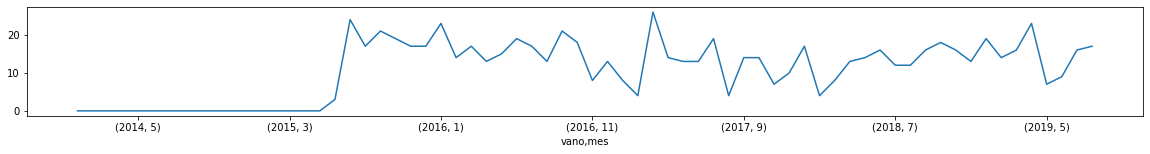

furto_bicicleta


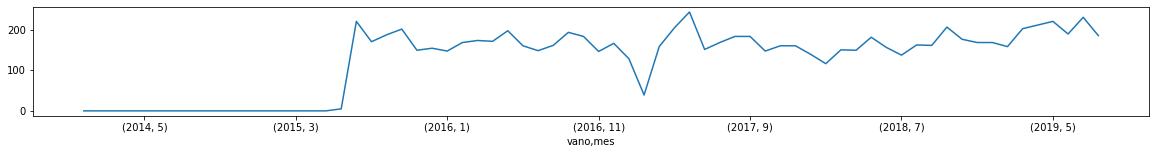

apreensao_drogas_sem_autor


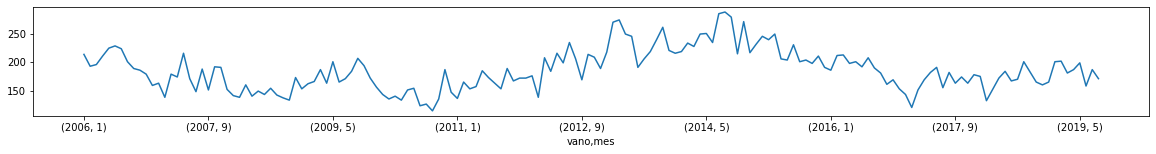

posse_drogas


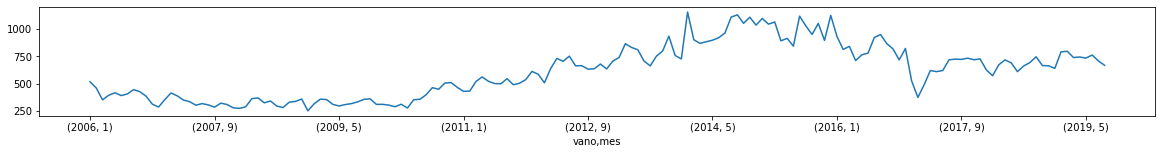

apf


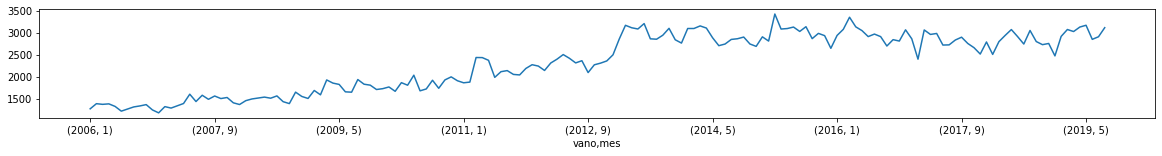

aaapai


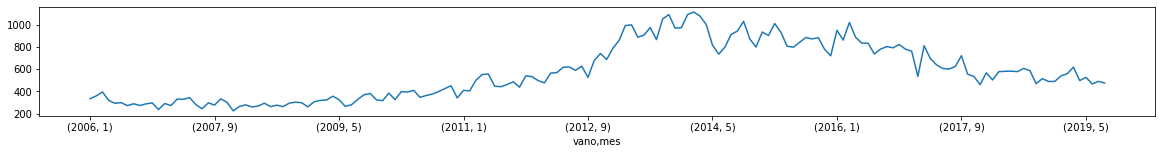

cmp


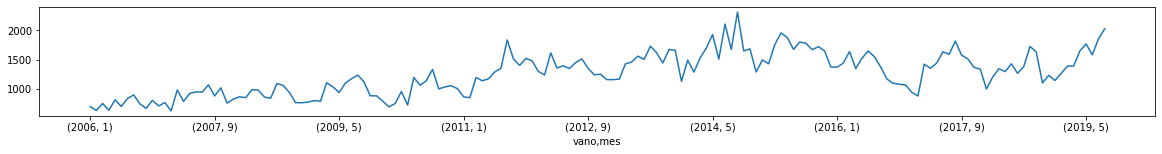

trafico_drogas


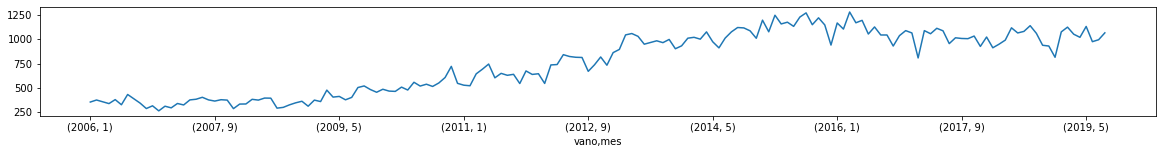

cmba


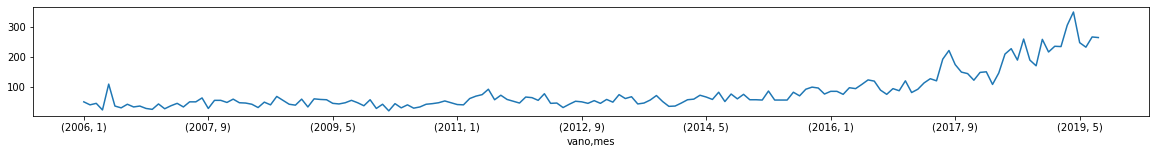

sequestro_relampago


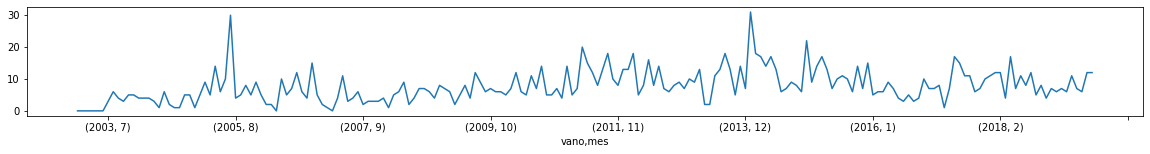

furto_coletivo


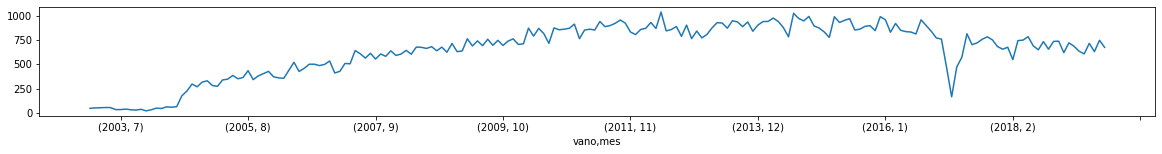

extorsao


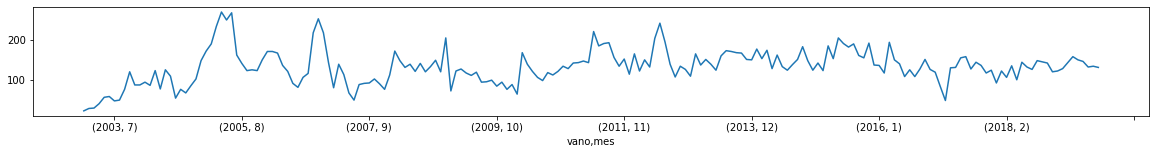

furto_celular


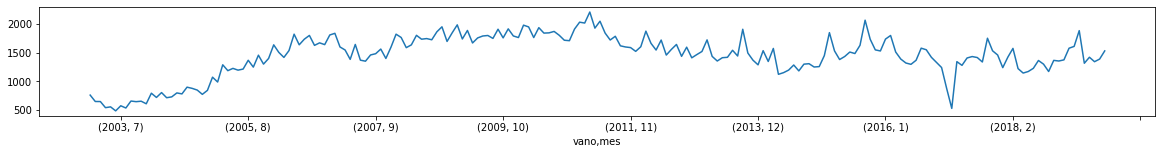

roubo_apos_saque


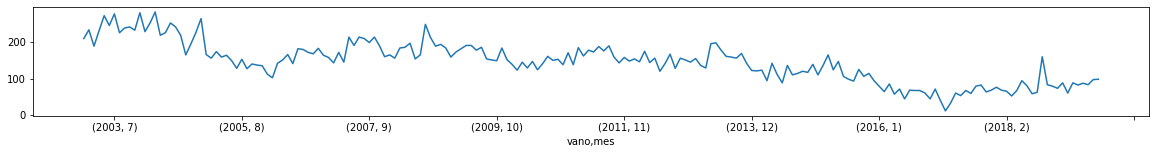

roubo_conducao_saque


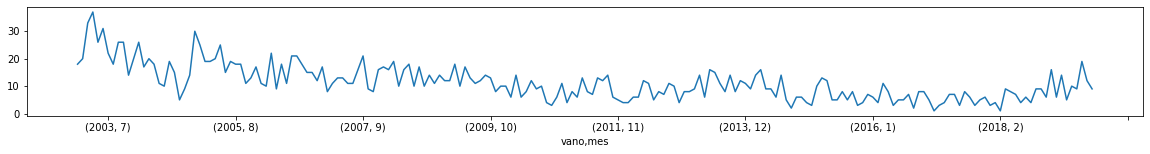

roubo_cx_eletronico


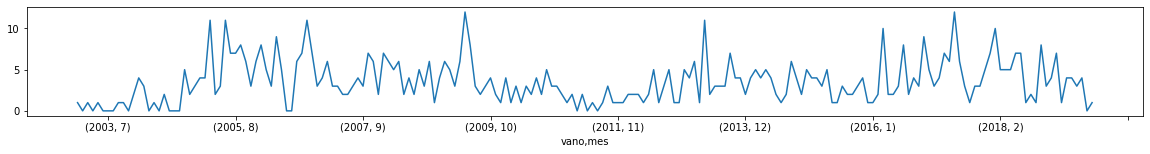

estupro


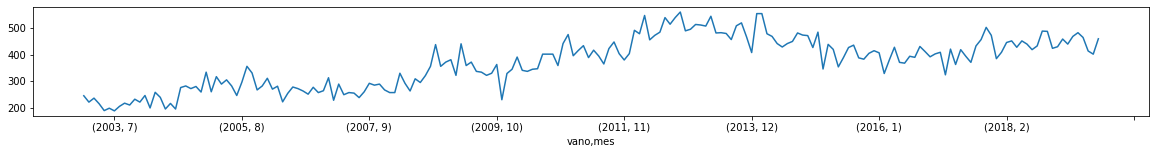

estelionato


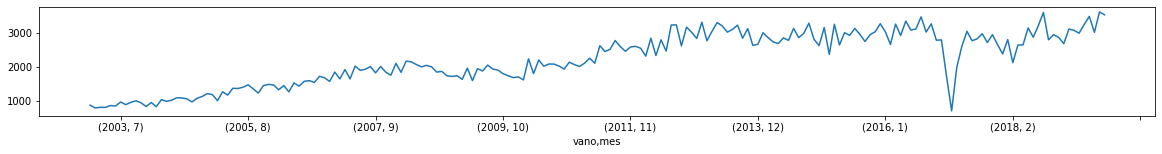

pol_civis_mortos_serv


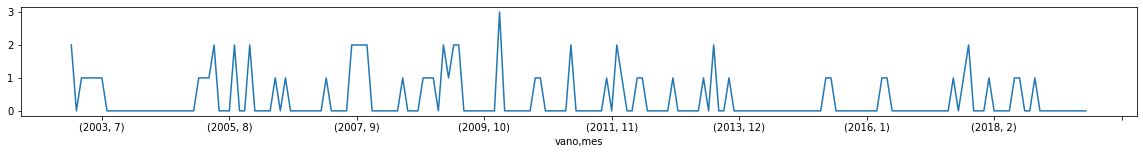

pol_militares_mortos_serv


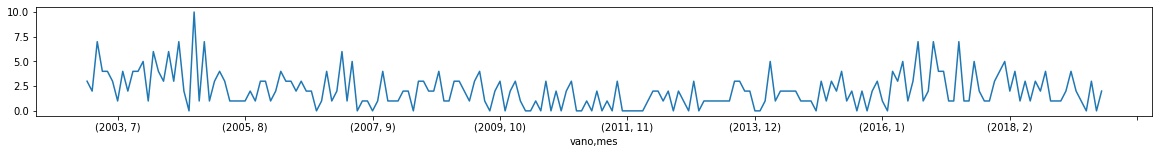

pessoas_desaparecidas


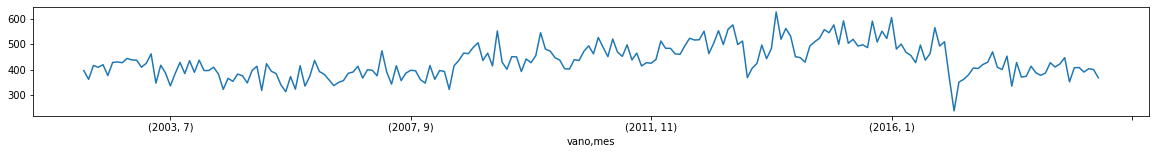

encontro_ossada


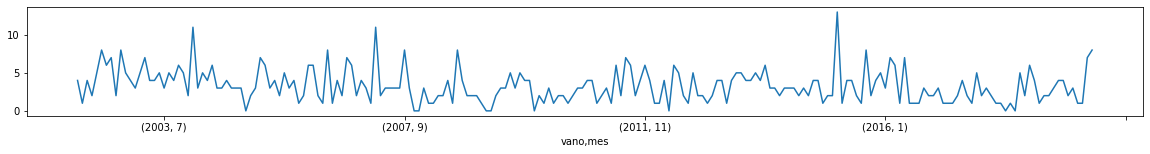

roubo_celular


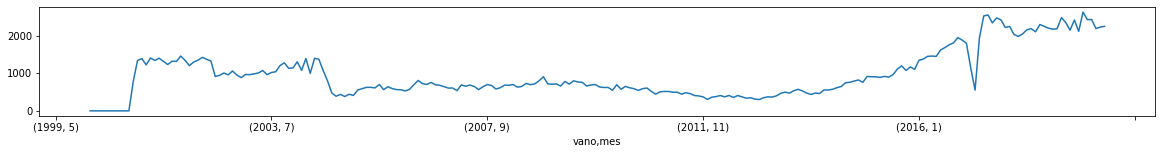

lesao_corp_culposa


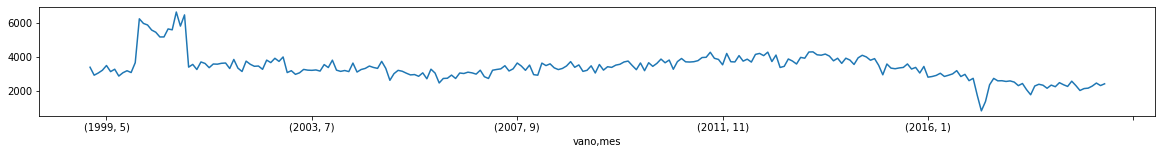

ameaca


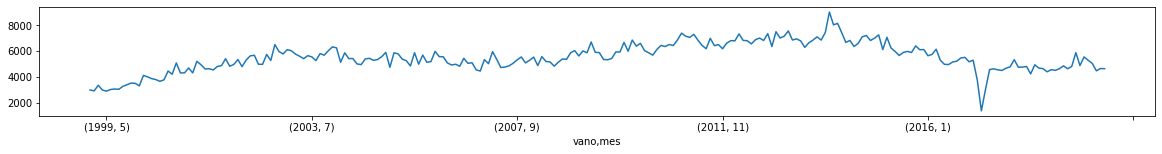

sequestro


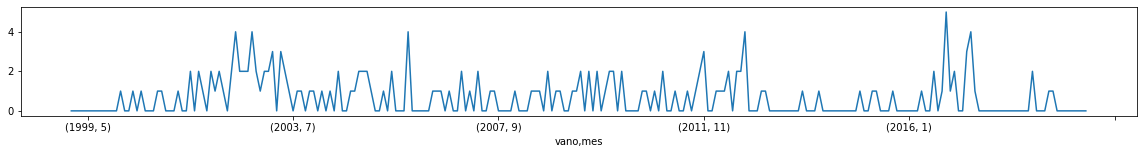

lesao_corp_morte


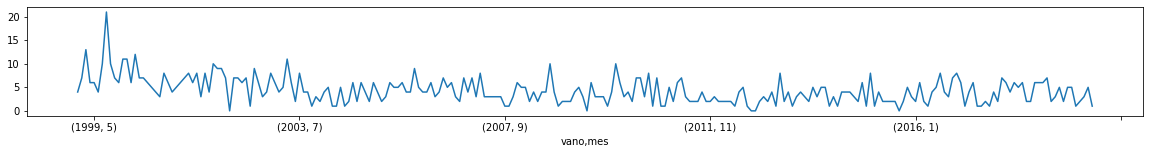

registro_ocorrencias


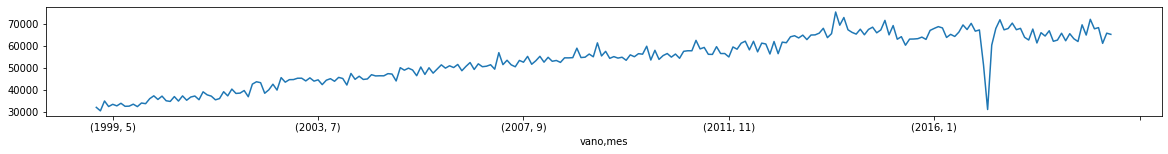

hom_por_interv_policial


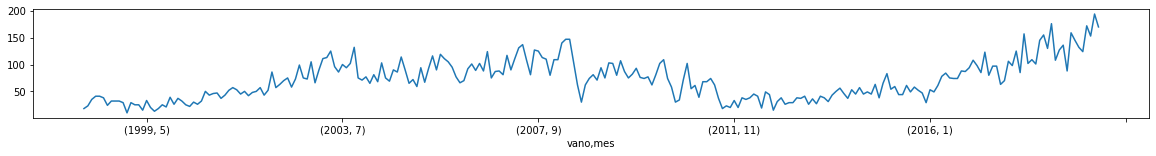

hom_culposo


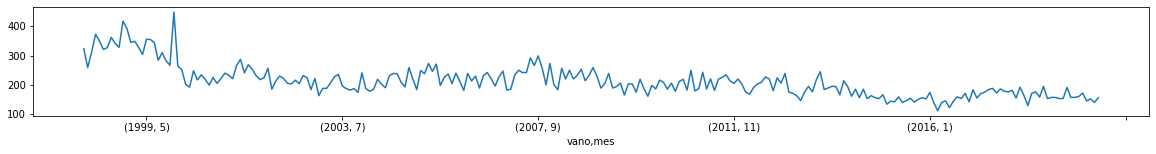

In [5]:
#Copia o dataset para um novodataset auxiliar (df2)
df2 = df.copy()

#Torna df2 com multi-index (ano e mes)
df2.set_index(['vano','mes'], inplace=True)

#Converte para uma lista as colunas com valores ausentes
lista_nulos = nulos.loc[nulos != 0].index.to_list()


#Para cada item na lista extraída acima, plotar um gráfico de linha para análise
for coluna in lista_nulos:
  print(coluna)
  fig = plt.figure(figsize=(20,2))
  df2[coluna].plot()
  plt.show()


Assim como previsto os dados estão ausentes por não terem registro desde 1991, podemos ver que a partir do momento que os dados começaram a ser registrados não há entradas faltantes, se tivesse valores faltantes não seria possivel ver uma linha continua nos gráficos acima plotados.

Portanto esses valores não devem ser removidos, para análises com algum desses indices, deve-se tomar o cuidado de ver a partir de quando se tem dados registrados.

## Analise dos Dados

### Roubo e Furto de veículos vs. recuperação de veículos

Podemos ver que se permanece uma tendência, de quantos mais veículos furtados e roubados, maior é a recuperação.

Porém o indice de veículos recuperados permanece baixo, cerca de apenas 42% dos veículos são recuperados.

Desde 1991, um total de 31443 veiculos foram furtados ou roubados e não foram recuperados.

In [6]:
#Resumo estatistico de recuperacao, furto e roubo de veiculos
df[['recuperacao_veiculos','furto_veiculos','roubo_veiculo']].describe()

,recuperacao_veiculos,furto_veiculos,roubo_veiculo
count,344.000000,344.000000,344.000000
mean,1772.238372,1674.671512,2448.697674
std,656.761843,294.852020,789.689559
min,729.000000,1159.000000,1097.000000
25%,1276.750000,1430.500000,1889.750000
50%,1755.000000,1637.500000,2322.000000
75%,2202.000000,1833.250000,2778.000000
max,3695.000000,2630.000000,5358.000000


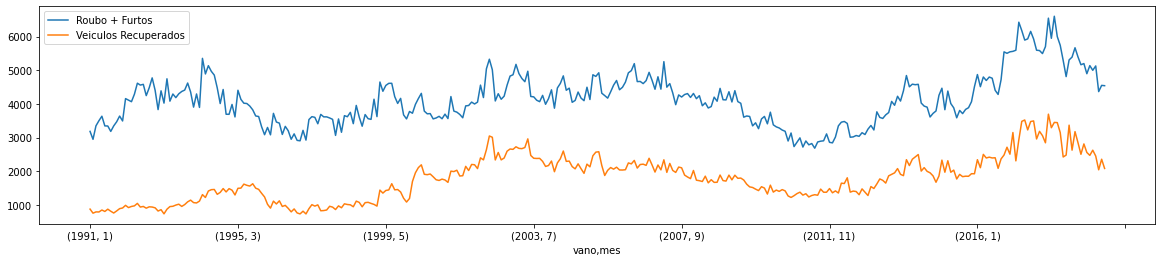

In [7]:
#Define tamanho as dimensões do gráfico
fig = plt.figure(figsize=(20,4))


roubo_e_furto_v = df2.roubo_veiculo+df2.furto_veiculos #Soma a quantidade de roubos e furtos do periodo
#oubo_e_furto_v.name('Roubo + Furtos')
roubo_e_furto_v.name = 'Roubo + Furtos'
df2.recuperacao_veiculos.name = 'Veiculos Recuperados'
roubo_e_furto_v.plot(legend=True);
df2.recuperacao_veiculos.plot(legend=True);



In [8]:
Porcentagem_rec_media = (df2.recuperacao_veiculos / roubo_e_furto_v).mean()
print('A recuperação média de veículos na série histórica é de apenas {}%'.format(round((Porcentagem_rec_media*100),1)))

A recuperação média de veículos na série histórica é de apenas 42.3%


In [9]:
#Total de veiculos não recuperados
nao_recuperados = (roubo_e_furto_v - df2.recuperacao_veiculos).loc[2018].sum()

print('Desde 1991, um total de {} veiculos foram furtados ou roubados e não foram recuperados'.format(nao_recuperados))

Desde 1991, um total de 31443 veiculos foram furtados ou roubados e não foram recuperados


### Homicidio doloso

É possivel visualizar uma tendência na queda de homicidios dolosos.

O maior valor já registrado foi em janeiro de 1995, com um total de 831 casos.

O menor valor registrado foi em junho de 2015, com 271 homicidios registrados.

Houve uma redução de 67,27% entre o maior e o menor valor registrado.



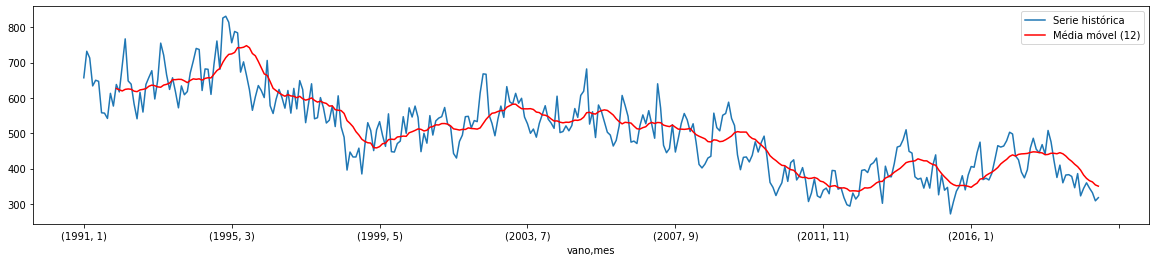

In [10]:
#Define tamanho as dimensões do gráfico
fig = plt.figure(figsize=(20,4))


df2.hom_doloso.plot(legend=True, label='Serie histórica')
df2.hom_doloso.rolling(12).mean().plot(legend=True, label='Média móvel (12)', color='red')

In [11]:
#Selecionar o ano e mês com menor e maior registro de homicidos
hom_dol_max = (df2.hom_doloso.loc[(df2.hom_doloso == df2.hom_doloso.max())])
hom_dol_min = (df2.hom_doloso.loc[(df2.hom_doloso == df2.hom_doloso.min())])


print('No mês {} de {}, houve a maior taxa de homicidio doloso no estado do Rio de Janeiro: {}'.format(hom_dol_max.index[0][1],hom_dol_max.index[0][0], hom_dol_max[0]))
print('No mês {} de {}, houve a maior taxa de homicidio doloso no estado do Rio de Janeiro: {}'.format(hom_dol_min.index[0][1],hom_dol_min.index[0][0], hom_dol_min[0]))

print('\nHouve redução de {}% entre o maior e o menor valor da série histórica'.format(round((1-(hom_dol_min[0] / hom_dol_max[0]))*100,2)))

No mês 1 de 1995, houve a maior taxa de homicidio doloso no estado do Rio de Janeiro: 831
No mês 6 de 2015, houve a maior taxa de homicidio doloso no estado do Rio de Janeiro: 272

Houve redução de 67.27% entre o maior e o menor valor da série histórica


### Total de roubos e furtos

Enquanto homicidios dolosos apresentou uma queda, os roubos e furtos apresentaram uma alta expressiva.

Foram quase 210% de aumento se comparadas as médias dos anos de 1991 e 2019.

Ano	Média / Mês
1991	9999.58
2019	30870.88

Aumento de 208.72% na média de roubos e furtos entre 1991 e 2019



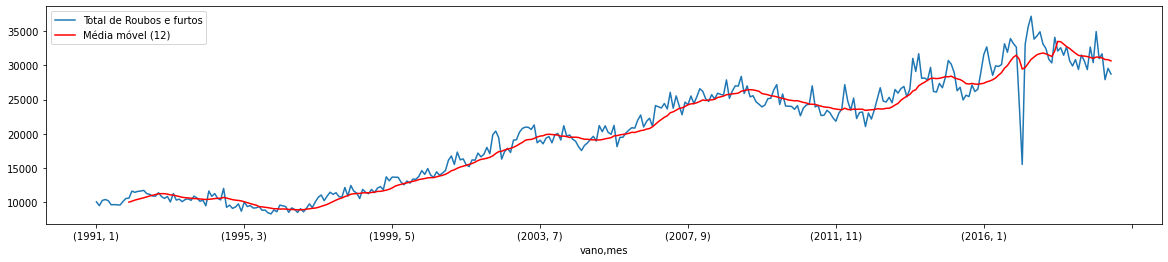

In [12]:
#Define tamanho as dimensões do gráfico
fig = plt.figure(figsize=(20,4))

#Soma dos dados de furtos e roubos
total = df2.total_roubos+df2.total_furtos

#PLotagem do gráfico junto com a média móvel dos últimos 12 meses
total.plot(legend=True, label='Total de Roubos e furtos')
total.rolling(12).mean().plot(legend=True, label='Média móvel (12)', color='red')

#Imprimir na tela a média para 1991 e 2019
print('Ano\tMédia / Mês')
print('1991\t{}'.format(round(total.loc[1991].mean(),2)))
print('2019\t{}'.format(round(total.loc[2019].mean(),2)))

#Porcentagem do aumento da média de roubos e furtos - 1991 | 2019
aumento_roubo_furto_p100 = (total.loc[2019].mean() - total.loc[1991].mean())*100 / total.loc[1991].mean()
print('\nAumento de {}% na média de roubos e furtos entre 1991 e 2019\n'.format(round(aumento_roubo_furto_p100,2)))


## Ocorrências Total e de 2014 a 2019


In [34]:
#Somar colunas de total de roubos e furtos
df_resumo = df2.copy()
df_resumo['total_roubos_furtos'] = df_resumo['total_furtos']+df_resumo['total_roubos']
df_resumo.drop(['total_roubos','total_furtos','outros_furtos'], axis=1, inplace=True)

#Somatória dos maiores indices
df_resumo.sum().sort_values(ascending=False).head(5)

registro_ocorrencias    13340952.0
total_roubos_furtos      6832286.0
lesao_corp_dolosa        1889523.0
indicador_roubo_rua      1628750.0
ameaca                   1371521.0
dtype: float64

In [35]:
#Indices de 2014 a 2019 a cada 1000 habitantes.
df_resumo.loc[2014:2019].sum().sort_values(ascending=False).head(5)*1000 / 18700000

registro_ocorrencias    238.412406
total_roubos_furtos     109.320963
indicador_roubo_rua      34.742781
roubo_transeunte         25.125561
lesao_corp_dolosa        21.450909
dtype: float64

## Conclusão

O estado do Rio de Janeiro apresentou melhoras em alguns indicadores ao mesmo tempo outros indicadores pioraram.

É possivel ver que por uma população de 18,7 milhôes de habitantes os dados são preocupantes, segue abaixo algumas informações resumidas.

Entre 1991 a 2020 foram registradas:
* Mais de 13 milhões de ocorrências;
* Mais de 6,8 milhões de roubos e furtos;
* Quase 1,9 milhão de registros de lesão corporal dolosa;
* Aproximadamente 1,6 milhão de roubos.



Entre Janeiro de 2014 e Agosto de 2019, foram registradas:  

* 238 ocorrências a cada mil habitantes;
* 109 Roubos ou furto a cada mil habitantes;
* 60 Roubos na rua / a transeunte a cada mil habitantes;
* 21 Lesões corporais dolosas.


Ou seja, quase que 1 ocorrência a cada 4 habitantes nos últimos 5 anos. 


Você gostaria de viver em um lugar assim? O que podemos fazer para mudar esse cenário?
